In [1]:
!pip install matplotlib pandas seaborn numpy

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import subprocess
import os

CPU_EXEC = "../build/src/MyProjectCPU"


current_path = os.getcwd()
cpu_path = os.path.join(current_path, "nbody_naive_cpu.csv")


In [6]:
# <array size> <output file>
for i in range(5, 14):
    array_size = 2 ** i
    print(f"Running for array size: {array_size}")

    for _ in range(10):
        command_cpu = [
            CPU_EXEC,
            str(array_size), 
            cpu_path
        ]
        # Ejecutar el comando
        result = subprocess.run(command_cpu, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        # Verificar si hubo algún error en la ejecución
        if result.returncode != 0:
            print("Error during execution:")
            print(result)
        else:
            print("Execution successful")

Running for array size: 32
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Running for array size: 64
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Running for array size: 128
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Running for array size: 256
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Execution successful
Running for array size: 512
Execution successful
E

KeyboardInterrupt: 

In [3]:
cpu = pd.read_csv("nbody_naive_cpu.csv", header=None)

cpu.columns = ["size", "data creation time", "execution time", "total time"]

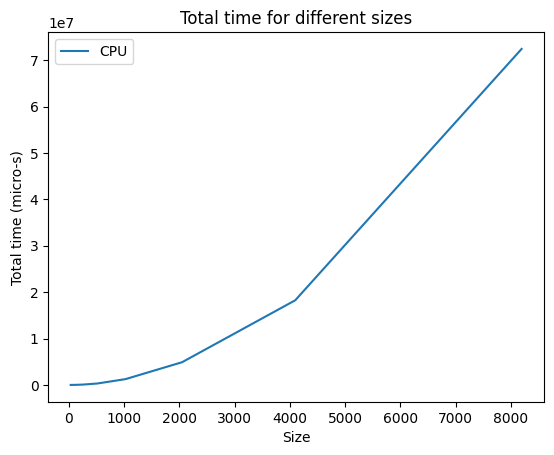

In [4]:
# plot avg total time for each size
cpu_avg = cpu.groupby("size").mean()

fig, ax = plt.subplots()
ax.plot(cpu_avg.index, cpu_avg["total time"], label="CPU")
ax.set_xlabel("Size")
ax.set_ylabel("Total time (micro-s)")
ax.legend()
plt.title("Total time for different sizes")
plt.show()

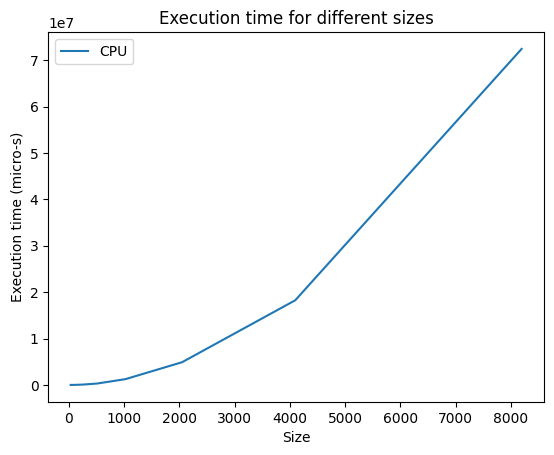

In [6]:
# plot avg execution time for each size
fig, ax = plt.subplots()
ax.plot(cpu_avg.index, cpu_avg["execution time"], label="CPU")

ax.set_xlabel("Size")
ax.set_ylabel("Execution time (micro-s)")
ax.legend()
plt.title("Execution time for different sizes")
plt.show()